<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[22차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ 딥러닝 기반 얼굴 추출 알고리즘에 대해 이해하고 사용할 수 있다.<br><br>
○ 딥러닝 기반 얼굴 인식 알고리즘에 대해 이해하고 사용할 수 있다.        
        </font></td></tr>   
</table>

# 딥러닝 기반 얼굴 추출

## SSD (Single Shot Dectector)
- 2015년 발표
- 다른 모델은 객체 감지를 위해 이미지를 2번 이상 반복하는 것에 반해 1번만으로 객체 감지
- 백본 모델(피쳐 맵 추출기로 작동하는 일반적인 사전 학습된 이미지 분류 네트워크)과 SSD 헤드(두 개의 컨볼루션 레이어로 구성, 바운딩박스 출력)로 구성

- 참고 : https://github.com/amdegroot/ssd.pytorch

## MTCNN (Multi-Task Cascaded Convolutional Neural Network)

- 2016년 4월 발표
- 3단계의 CNN으로 구성
  - P-Net (Proposed Net) : 얕은 CNN을 통해 후보 창을 신속하게 생성
  - R-Net (Refine Net) : 더 복잡한 CNN을 통해 많은 수의 얼굴이 아닌 바운딩 박스를 제외하여 구체화
  - O-Net (Output Net) : 강력한 CNN을 사용하여 결과를 구체화하고 다섯 개의 얼굴 랜드 마크 위치를 출력

- 논문 : https://kpzhang93.github.io/MTCNN_face_detection_alignment/paper/spl.pdf
- 참고 : https://github.com/ipazc/mtcnn

  
<img src="./lecture_image/22_mtcnn.jpg" width="30%">    

In [ ]:
!pip install mtcnn

In [ ]:
#실습
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

detector = MTCNN()

img = cv2.imread("./image/faces4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 얼굴 영역 검출(x, y, w, h)
faces = detector.detect_faces(img)

print(faces)

for face in faces :
    if face["confidence"] > 0.7 :
        x, y, w, h = face["box"]
        
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        
        # keypoints : left_eye, right_eye, nose, mouse_left, mouth_right 등 좌표
        keypoints = face["keypoints"]
        cv2.circle(img, keypoints["left_eye"], 2, (255, 0, 0), 2)
        cv2.circle(img, keypoints["right_eye"], 2, (255, 0, 0), 2)
        cv2.circle(img, keypoints["nose"], 2, (255, 0, 0), 2)
        cv2.circle(img, keypoints["mouth_left"], 2, (255, 0, 0), 2)
        cv2.circle(img, keypoints["mouth_right"], 2, (255, 0, 0), 2)

        
plt.imshow(img)
plt.axis("off")

In [ ]:
#실습
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

detector = MTCNN()

img = cv2.imread("./image/many_faces2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 얼굴 영역 검출(x, y, w, h)
faces = detector.detect_faces(img)

print(faces)

for face in faces :
    if face["confidence"] > 0.7 :
        x, y, w, h = face["box"]
        
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        
plt.imshow(img)
plt.axis("off")

<img src="./lecture_image/22_iou.png" style="width:500px;height:auto;">

- 실제 물체의 30% 이상만 찾아도 그 물체로 인식

In [ ]:
import face_detection
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/faces4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 정확도 : 50%이상, IoU(매칭도) : 30%이상인 경우에만 검출
detector = face_detection.build_detector("DSFDDetector", 
                                         confidence_threshold=0.5, 
                                         nms_iou_threshold=0.3)
faces = detector.detect(img)

print(faces)

for (x1, y1, x2, y2, conf) in faces :
    if conf >= 0.9 :
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        
plt.imshow(img)
plt.axis("off")

## DSFD (Dual Shot Face Dectector)

- 2019년 4월 발표
- 2개의 스트림 형태로 구성
- 논문 : https://arxiv.org/abs/1810.10220
- 참고 : https://github.com/yxlijun/DSFD.pytorch
- face_detection 참고 : https://pypi.org/project/face-detection/

<img src="./lecture_image/22_dsfd.png" width="50%">    
- 선생님께서 하신 것중에 결과가 제일 잘 나옴

In [ ]:
!pip install face_detection

In [ ]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/faces4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 얼굴 검출(정확도, 얼굴 영역, 랜드마크 점 5개)
faces = RetinaFace.detect_faces(img)

print(faces)

In [ ]:
# 값들을 정수형으로 변환해서 tuple로 반환
def int_tuple(t) :
    return tuple(int(x) for x in t)

for key in faces :
    identity = faces[key]
    
    score = identity["score"]
    face_area = identity["facial_area"]
    landmarks = identity["landmarks"]
    
    cv2.circle(img, int_tuple(landmarks["right_eye"]), 3, (0, 0, 255), -1)
    cv2.circle(img, int_tuple(landmarks["left_eye"]), 3, (0, 0, 255), -1)
    cv2.circle(img, int_tuple(landmarks["nose"]), 3, (0, 0, 255), -1)
    cv2.circle(img, int_tuple(landmarks["mouth_right"]), 3, (0, 0, 255), -1)
    cv2.circle(img, int_tuple(landmarks["mouth_left"]), 3, (0, 0, 255), -1)
    
    cv2.rectangle(img, (face_area[2], face_area[3]), (face_area[0], face_area[1]), (255, 0, 0), 2)
    
plt.imshow(img)
plt.axis("off")

In [ ]:
# 얼굴 영역만 출력
img = cv2.imread("./image/faces4.jpg")

faces = RetinaFace.extract_faces(img)

for face in faces :
    plt.imshow(face)
    plt.axis("off")
    plt.show()

In [ ]:
#실습
import cv2
import numpy as np
import matplotlib.pyplot as plt

detector = cv2.FaceDetectorYN.create("./model/face_detection_yunet_120x160.onnx","", (0, 0))

img = cv2.imread("./image/faces4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

w, h, _ = img.shape
detector.setInputSize((h, w))

# 얼굴 영역(x, y, w, h), 왼쪽 눈좌표, 오른쪽 눈 좌표
# 코자표, 왼쪽입술좌표, 오른쪽 입술좌표, 정확도
_, faces = detector.detect(img)

print(faces)

for face in faces :
    # 얼굴 영역좌표만 잘라서 리스트 저장(정수형으로 반환)
    box = list(map(int, face[:4]))
    
    cv2.rectangle(img, box, (0, 0, 255), 2)
    
plt.imshow(img)
plt.axis("off")

## RetinaFace

- 2019년 5월 발표
- 성능이 매우 우수한 얼굴인식기 (mxnet 기반)
- 참고 : https://github.com/serengil/retinaface

In [ ]:
!pip install retina-face

In [ ]:
#실습
import face_recognition as fr
import matplotlib.pyplot as plt

imgElon1 = cv2.imread("./image/face_info/Elon1.jpg")
imgElon1 = cv2.cvtColor(imgElon1, cv2.COLOR_BGR2RGB)
imgElon2 = cv2.imread("./image/face_info/Elon2.jpg")
imgElon2 = cv2.cvtColor(imgElon2, cv2.COLOR_BGR2RGB)
imgBill1 = cv2.imread("./image/face_info/Bill1.jpg")
imgBill1 = cv2.cvtColor(imgBill1, cv2.COLOR_BGR2RGB)
imgBill2 = cv2.imread("./image/face_info/Bill2.jpg")
imgBill2 = cv2.cvtColor(imgBill2, cv2.COLOR_BGR2RGB)

In [ ]:
#실습
# 얼굴 영역 검출 (y1, x2, y2, x1)
faceElon1 = fr.face_locations(imgElon1)
faceElon2 = fr.face_locations(imgElon2)
faceBill1 = fr.face_locations(imgBill1)
faceBill2 = fr.face_locations(imgBill2)

print(faceElon1)
print(faceElon2)
print(faceBill1)
print(faceBill2)

cv2.rectangle(imgElon1, (faceElon1[0][3], faceElon1[0][0]), (faceElon1[0][1], faceElon1[0][2]), (255, 0, 0), 2)
cv2.rectangle(imgElon2, (faceElon2[0][3], faceElon2[0][0]), (faceElon2[0][1], faceElon2[0][2]), (255, 0, 0), 2)
cv2.rectangle(imgBill1, (faceBill1[0][3], faceBill1[0][0]), (faceBill1[0][1], faceBill1[0][2]), (255, 0, 0), 2)
cv2.rectangle(imgBill2, (faceBill2[0][3], faceBill2[0][0]), (faceBill2[0][1], faceBill2[0][2]), (255, 0, 0), 2)

plt.subplot(1, 2, 1)
plt.imshow(imgElon1)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imgElon2)
plt.axis("off")
plt.show()

plt.subplot(2, 2, 1)
plt.imshow(imgBill1)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(imgBill2)
plt.axis("off")

plt.show()

In [ ]:
#실습
# 얼굴 영역들의 특징 분석
encodeElon1 = fr.face_encodings(imgElon1)[0]
encodeElon2 = fr.face_encodings(imgElon2)[0]
encodeBill1 = fr.face_encodings(imgBill1)[0]
encodeBill2 = fr.face_encodings(imgBill2)[0]

print(encodeElon1)

In [ ]:
# 얼굴 인식(얼굴 비교)
result1 = fr.compare_faces([encodeElon1], encodeElon2)
print(result1)

result2 = fr.compare_faces([encodeBill1], encodeBill2)
print(result2)

In [ ]:
# 정확도(거리) 분석 - 큰 값일수록 불일치
conf1 = fr.face_distance([encodeElon1], encodeElon2)
print(conf1)

conf2 = fr.face_distance([encodeBill1], encodeBill2)
print(conf2)

conf3 = fr.face_distance([encodeBill1], encodeElon1)
print(conf3)

conf4 = fr.face_distance([encodeElon1], encodeBill2)
print(conf4)

In [ ]:
import face_recognition as fr
import matplotlib.pyplot as plt

# 이미지 증식 때 썼던 것처럼 폴더 내 이미지를 불러와서 인코딩하고 얼굴 인식을 시켜보자
imgMy1 = cv2.imread("./image/face_info/kmj1.jpg")
imgMy1 = cv2.cvtColor(imgMy1, cv2.COLOR_BGR2RGB)
imgMy2 = cv2.imread("./image/face_info/kmj.jpg")
imgMy2 = cv2.cvtColor(imgMy2, cv2.COLOR_BGR2RGB)
imgMy3 = cv2.imread("./image/face_info/kmj3.jpg")
imgMy3 = cv2.cvtColor(imgMy3, cv2.COLOR_BGR2RGB)
imgMy4 = cv2.imread("./image/face_info/kmj2.jpg")
imgMy4 = cv2.cvtColor(imgMy4, cv2.COLOR_BGR2RGB)

# 얼굴 영역들의 특징 분석
encodeMy1 = fr.face_encodings(imgMy1)[0]
encodeMy2 = fr.face_encodings(imgMy2)[0]
encodeMy3 = fr.face_encodings(imgMy3)[0]
encodeMy4 = fr.face_encodings(imgMy4)[0]

# 얼굴 인식(얼굴 비교)
result1 = fr.compare_faces([encodeMy1], encodeMy3)
print(result1)

result2 = fr.compare_faces([encodeMy1], encodeMy4)
print(result2)

# 정확도(거리) 분석 - 큰 값일수록 불일치
conf1 = fr.face_distance([encodeMy1], encodeMy3)
print(conf1)

conf2 = fr.face_distance([encodeMy1], encodeMy4)
print(conf2)

- 정면 사진만 있으면 그 사람의 정면 얼굴만 인식 >> 다양한 각도의 얼굴을 넣어서 다양한 각도에서 본 얼굴도 인식할 수 있도록 하자!

## YuNet

- 2021년 10월 발표
- CNN기반 얼굴 탐지기로 가볍고 빠름 (모델이 MB 미만)
- 백본으로 mobilenet을 채택하고 총 85,000 개의 매개 변수를 포함
- 정면얼굴이 아닌 경우에도 잘 동작
- 참고 : https://github.com/opencv/opencv_zoo/tree/master/models/face_detection_yunet
- 모델 훈련 : https://github.com/ShiqiYu/libfacedetection.train

In [ ]:
#실습

## 얼굴인식

- 실시간 오픈 소스 얼굴인식 소프트웨어
  - 딥 페이스 : https://github.com/serengil/deepface?ref=hackernoon.com
    - FaceNet 및 InsightFace와 같은 다양한 얼굴 인식 방법을 지원
    - Python 개발자라면 시작하기 쉽지만 다른 사람들이 통합하기 어려움 
  - CompareFace : https://github.com/exadel-inc/CompreFace
    - REST API를 사용하면 사전 기계 학습 기술 없이도 시스템에 쉽게 통합 가능
    - 확장 가능하므로 여러 비디오 스트림에서 얼굴을 동시에 인식 가능
    - FaceNet과 InsightFace 선택 가능
    - 현재 개발 중
  - face_recognition : https://github.com/ageitgey/face_recognition?ref=hackernoon.com
    - 인기있는 API이지만 큰 개선 사항이 없고 상당히 오래된 얼굴 인식 모델을 사용
  - FaceNet : https://github.com/davidsandberg/facenet?ref=hackernoon.com
    - 정확도가 매우 높은 API지만 개선이 없음
  - InsightFace : https://github.com/deepinsight/insightface?ref=hackernoon.com
    - 얼굴 감지를 위해 가장 최근의 정확한 얼굴 인식 방법 중 하나
    - LetinaFace 및 SubCenter-ArcFace를 지원
    - 사용하기 쉽지 않다는 단점
  - InsightFace-REST : https://github.com/SthPhoenix/InsightFace-REST?ref=hackernoon.com
    - 2021년부터 생성된 API로 인식속도 향상 버전
    - 얼굴 임베딩만 제공하므로 분류기는 따로 만들어야 함

### face recognition 기반 이미지 내 얼굴 인식

- face_recognition : 업데이터 중지, 오래된 모델
  - https://wiserloner.tistory.com/1123

In [ ]:
!pip install face_recognition

In [ ]:
#실습

In [ ]:
#실습

### 동영상 내의 얼굴 인식 

- 인코딩된 얼굴 데이터를 읽어와서 누구인지 인식하고 표시

In [ ]:
#실습
import cv2
import numpy as np
import face_recognition as fr
import os

# 얼굴 특징을 추출하는 함수
def encodeFun(img_paths) :
    encode_list = []
    
    for img_path in img_paths :
        encode = fr.face_encodings(img_path)[0]
        encode_list.append(encode)
        
    return encode_list

path = "./image/face_info/"

# 이미지 데이터베이스의 이미지 리스트
images = []
# 이미지 라벨
className = []

# 폴더의 이미지 목록 가져오기
myList = os.listdir(path)

# 이미지 목록을 읽어서 파일명과 클래스 이름을 저장
for c in myList :
    if c == '.ipynb_checkpoints' :
        continue
    curImg = cv2.imread(f"{path}/{c}")
    curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)
    images.append(curImg)
    # 파일명에서 확장자를 제거하고 파일명만 클래스 이름으로 저장
    className.append(os.path.splitext(c)[0])
    
# 폴더에 있는 얼굴이미지 인코딩(얼굴DB)
encodeListKnown = encodeFun(images)
print(className)

cap = cv2.VideoCapture("./image/ellon.mp4")

while cap.isOpened() :
    ret, frame = cap.read()
    
    if not ret :
        continue
        
        
    # 얼굴 크기를 정규화 : 얼굴 크기를 25% 크기로 변환
    # 이미지를 축소하는 이유 : 속도를 조금 더 빠르게 하기위해
    imgS = cv2.resize(frame, (0, 0), None, 0.25, 0.25)

    # 동영상에서 어굴 위치정보를 추출하고 해당 얼굴을 비교하기 위해 인코딩
    faceCurFrame = fr.face_locations(imgS)
    encodesCurFrame = fr.face_encodings(imgS, faceCurFrame)
    
    # 동영상의 얼굴과 얼굴 DB의 정보를 비교
    for encodeFace, faceLoc in zip(encodesCurFrame, faceCurFrame) :
        matches = fr.compare_faces(encodeListKnown, encodeFace)
        faceDis = fr.face_distance(encodeListKnown, encodeFace)
        
        # 거리값이 최소인 값의 인덱스를 반환
        matchindex = np.argmin(faceDis)
        
        # DB의 얼굴과 동일한 얼굴이 있다면
        if matches[matchindex] :
            y1, x2, y2, x1 = faceLoc
            # 25%로 줄였기 때문에 좌표를 원래대로 복구
            y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
            
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            cv2.putText(frame, className[matchindex], (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)

    cv2.imshow("detect face", frame)

    key = cv2.waitKey(1)  # 0.001초만 대기

    if key == 49 :
        break
            
cap.release()
cv2.destroyAllWindows()  # 창 닫기

### 딥페이스 기반 얼굴인식

- 딥페이스 
  - 다양한 얼굴 모델 사용 사용 가능 

In [ ]:
!pip install deepface

In [2]:
#실습
from deepface import DeepFace

face1 = "./image/face_info/Elon1.jpg"
face2 = "./image/face_info/Elon2.jpg"
face3 = "./image/face_info/Bill.jpg"
#face4 = "./image/face_info/Bill2.jpg" - 잘 인식 못하는 것 같아서 빼기

# 사용할 모델 종류
models = ['VGG-FACE', 'Facenet', 'Facenet512', 'OpenFace', 'DeepFace', 'DeepID', 'ArcFace', 'Dlib']

# 평가 방법
metrics = ['cosine', 'euclidean', 'euclidean_12']

# 두 얼굴쌍 비교
result = DeepFace.verify(img1_path=face1, img2_path=face2, model_name=models[4], distance_metric=metrics[0])

result

KeyboardInterrupt: 

In [ ]:
#실습
# 동일한 얼굴을 DB에서 검색
df = DeepFace.find(img_path=face1, db_path="./image/face_info/")
df

In [ ]:
#실습
# 얼굴 상태 비교(나이, 성별, 인종, 표정)
# 인종 : asian, white, middle, eastern, indian, latino, black
# 표정 : angry, fear, neutral, sad, disgust, happy, surprise

result = DeepFace.analyze(img_path=face1,
                          actions=["age", "gender", "race", "emotion"])

result

In [ ]:
#실습
# 얼굴 상태 비교(나이, 성별, 인종, 표정)
# 인종 : asian, white, middle, eastern, indian, latino, black
# 표정 : angry, fear, neutral, sad, disgust, happy, surprise
face1 = "./image/face2.jpg"
result = DeepFace.analyze(img_path=face1,
                          actions=["age", "gender", "race", "emotion"])

result

In [3]:
#실습
from deepface import DeepFace

# q 누르면 종료
DeepFace.stream(db_path="./image/face_info/")


Detector backend is  opencv
VGG-Face  is built
Emotion model loaded
Age model loaded
Gender model loaded
Facial attibute analysis models loaded in  2.4141857624053955  seconds


Finding embedding for Bill1.jpg:   0%|                                                           | 0/8 [00:00<?, ?it/s]

1/1 [==============================] - 0s 344ms/step


Finding embedding for Bill2.jpg:  12%|██████▍                                            | 1/8 [00:00<00:04,  1.44it/s]

1/1 [==============================] - 0s 156ms/step


Finding embedding for Elon1.jpg:  25%|████████████▊                                      | 2/8 [00:00<00:02,  2.42it/s]

1/1 [==============================] - 0s 153ms/step


Finding embedding for Elon2.jpg:  38%|███████████████████▏                               | 3/8 [00:01<00:01,  3.04it/s]

1/1 [==============================] - 0s 148ms/step


Finding embedding for kmj.jpg:  50%|██████████████████████████▌                          | 4/8 [00:01<00:01,  3.66it/s]

1/1 [==============================] - 0s 158ms/step


Finding embedding for kmj1.jpg:  62%|████████████████████████████████▌                   | 5/8 [00:01<00:00,  3.43it/s]

1/1 [==============================] - 0s 163ms/step


Finding embedding for kmj2.jpg:  75%|███████████████████████████████████████             | 6/8 [00:01<00:00,  3.81it/s]

1/1 [==============================] - 0s 159ms/step


Finding embedding for kmj3.jpg:  88%|█████████████████████████████████████████████▌      | 7/8 [00:02<00:00,  4.16it/s]

1/1 [==============================] - 0s 160ms/step


Finding embedding for kmj3.jpg: 100%|████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.03it/s]


Embeddings found for given data set in  2.6512506008148193  seconds
1/1 [==============================] - 0s 155ms/step


In [4]:
#실습
from deepface import DeepFace

# q 누르면 종료
DeepFace.stream(
    db_path='./image/face_info/',
    model_name='Facenet',
    detector_backend='opencv',
    distance_metric='cosine'
)

# 서양 얼굴을 주로 인식하기 때문에 성별을 맞게 잘 안나옴

Detector backend is  opencv
facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: C:\Users\AI\.deepface\weights\facenet_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 92.2M/92.2M [00:35<00:00, 2.58MB/s]


Facenet  is built
Emotion model loaded
Age model loaded
Gender model loaded
Facial attibute analysis models loaded in  0.001994609832763672  seconds


Finding embedding for Bill1.jpg:   0%|                                                           | 0/8 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


Finding embedding for Bill2.jpg:  12%|██████▍                                            | 1/8 [00:01<00:10,  1.51s/it]

1/1 [==============================] - 0s 54ms/step


Finding embedding for Elon1.jpg:  25%|████████████▊                                      | 2/8 [00:01<00:04,  1.45it/s]

1/1 [==============================] - 0s 47ms/step


Finding embedding for Elon2.jpg:  38%|███████████████████▏                               | 3/8 [00:01<00:02,  2.29it/s]

1/1 [==============================] - 0s 45ms/step


Finding embedding for kmj.jpg:  38%|███████████████████▉                                 | 3/8 [00:01<00:02,  2.29it/s]

1/1 [==============================] - 0s 45ms/step


Finding embedding for kmj1.jpg:  62%|████████████████████████████████▌                   | 5/8 [00:02<00:00,  3.61it/s]

1/1 [==============================] - 0s 48ms/step


Finding embedding for kmj2.jpg:  75%|███████████████████████████████████████             | 6/8 [00:02<00:00,  4.41it/s]

1/1 [==============================] - 0s 46ms/step


Finding embedding for kmj3.jpg:  75%|███████████████████████████████████████             | 6/8 [00:02<00:00,  4.41it/s]

1/1 [==============================] - 0s 44ms/step


Finding embedding for kmj3.jpg: 100%|████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.99it/s]


Embeddings found for given data set in  2.676521062850952  seconds
1/1 [==============================] - 0s 44ms/step


- 결과가 잘 안나오는 것 같으면
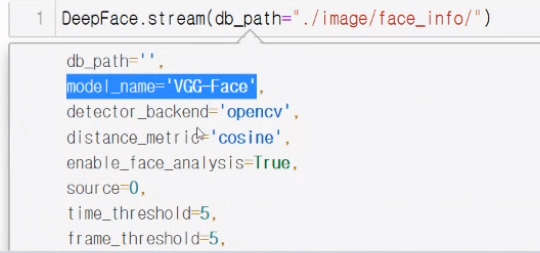
Model을 설정해 줄 수 있음

In [ ]:
#실습

In [ ]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[22차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>○            
        </font></td></tr>   
</table>